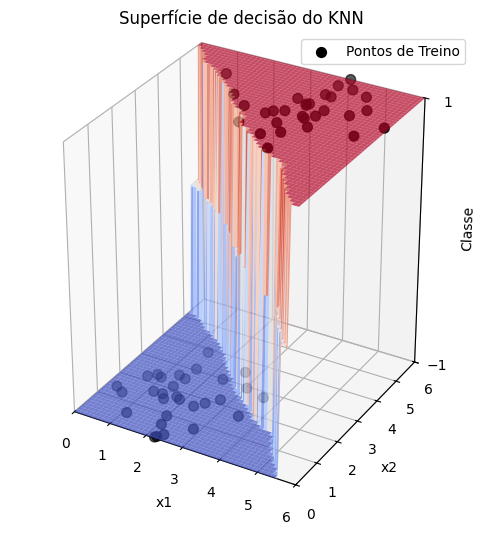

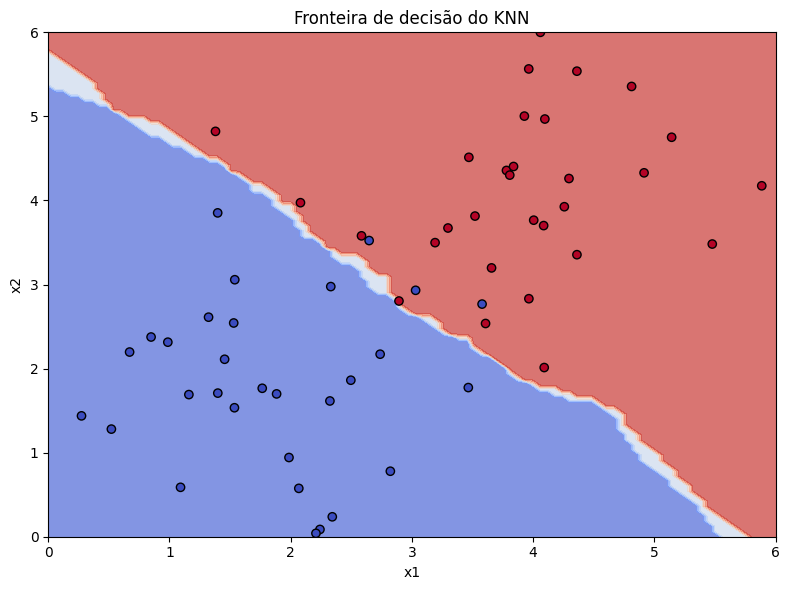

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def myknn(xt, xall, yall, k):
    dall = np.sum((xall - xt) ** 2, axis=1)
    orddall = np.argsort(dall)
    yhat = np.sign(np.sum(yall[orddall[:k]]))
    return yhat

# Parâmetros
k = 30
N = 30
np.random.seed(42)

# Gerando dados
def generate_limited_data(mean, std, size, min_val=0, max_val=6):
    data = np.random.normal(loc=mean, scale=std, size=(size, 2))
    data = np.clip(data, min_val, max_val)  # Corta valores fora do intervalo
    return data

xc1 = generate_limited_data(mean=2, std=1, size=N)
xc2 = generate_limited_data(mean=4, std=1, size=N)
yc1 = np.full((N, 1), -1)
yc2 = np.full((N, 1), 1)

X_train = np.vstack((xc1, xc2))
y_train = np.vstack((yc1, yc2)).flatten()

# Criando uma grade de pontos dentro do intervalo desejado
x_min, x_max = 0, 6
y_min, y_max = 0, 6
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calculando a decisão do KNN para cada ponto da grade
M = np.array([myknn(np.array([x, y]), X_train, y_train, k) for x, y in zip(X.ravel(), Y.ravel())])
M = M.reshape(X.shape)

# Superfície de decisão 3D
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, M, cmap='coolwarm', edgecolor='none', alpha=0.7)
ax1.scatter(X_train[:, 0], X_train[:, 1], y_train, color='black', marker='o', s=50, label='Pontos de Treino')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('Classe')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_zlim(-1, 1)
ax1.set_zticks([-1, 1])
ax1.set_box_aspect([1, 1, 1.2])
ax1.set_title('Superfície de decisão do KNN')
ax1.legend()

# Fronteira de decisão 2D
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111)
ax2.contourf(X, Y, M, cmap='coolwarm', alpha=0.7)
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='black')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_title('Fronteira de decisão do KNN')

plt.tight_layout()
plt.show()